TEAM MEMBERS: BILL KISUYA, JOAN NJOROGE, BRENDA MUTAI, BRIAN NGENY, JEFF KIARIE & IVAN KIBET.

# 1.Introduction

Vehicle accidents are a major source of worry for public safety and transportation agencies. They not only cause death and property damage, but also interrupt traffic flow and incur economic losses. Understanding the factors that contribute to these collisions and their effects is critical for putting effective measures in place to decrease their occurrence and impact.

The City of Chicago has collected extensive crash data through its electronic crash reporting system (E-Crash), providing a valuable resource to analyse and gain insights into the factors contributing to accidents. The dataset comprises a wide range of crash parameters, including crash circumstances, vehicles involved, and people affected.

The goal of this study is to analyse the dataset and provide a full understanding of car crashes and their characteristics in the city of Chicago. We hope to discover key factors that contribute to collisions, measure the impact they have, and analyse the circumstances surrounding the accidents by studying the numerous characteristics associated with each crash event.

This project's target audience includes numerous road safety stakeholders such as transportation authorities, law enforcement agencies, policymakers, and insurance companies. Decision-makers can establish focused plans and activities to reduce the frequency and severity of accidents by knowing the fundamental elements that contribute to collisions.

# 2. Business Understanding

The city of Chicago maintains an electronic crash reporting system (E-Crash) which shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data from the CPD's electronic crash reporting system (E-Crash) are displayed without any identifying information. When a crash report is completed or when an existing report in E-Crash receives updates, records are added to the data portal. The drivers involved in most minor incidents self-report about half of all crash reports to the police station, while the other half are documented on the scene by the responding police officer. The reporting officer records several crash parameters, such as information on street conditions, weather, and posted speed restrictions, based on the best information at the moment, but many of these may conflict with posted data or other assessments of road conditions.

The dataset offers useful information for evaluating traffic incidents, spotting patterns, and putting safety measures in place to lower casualties and improve road safety. This information can be used by researchers, decision-makers, and analysts to make more informed choices and enhance overall road transportation systems. The goal of this research is to create a categorization model that will aid in determining the characteristics of an automobile collision that are significant.

# 3.Problem statement

Traffic accidents occur due to various factors, including vehicle characteristics, driver behavior, road conditions, weather, and traffic patterns. The Vehicle Safety Board and the City of Chicago who are the stakeholder recognize the importance of identifying and understanding the various factors leading to the accidents in order to implement targeted safety interventions and improve overall road safety.
From the several factors our primary objective that we aim to achieve are:
 
* To develop a model that can accurately determine the primary cause of car accidents by utilizing data, on vehicles, individuals and road conditions
*  To recommend to the City of Chicago Department of Transportation proactive measures to mitigate the risks, injuries and enhance overall road safety.

# 4. Data Understanding

We will make use of datasets from the Chicago Data Portal, an open data resource where one may find relevant information about the city. In particular we will be focusing on three datasets:Traffic Crashes - Vehicles, Traffic Crashes - People and Traffic Crashes - Crashes. 
 
**Dataset 1: CRASH Data**
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.  

* CRASH_DATE:Date and time of crash as entered by the reporting officer

* WEATHER_CONDITION:Weather condition at time of crash, as determined by reporting officer

* ROADWAY_SURFACE_COND:Road surface condition, as determined by reporting officer

* CRASH_TYPE:A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

The full description of the columns can be found here or the columns_desc.txt file.

Insights:When the weather is clear throughout the day, accidents tend to occur more frequently.

**Dataset 2: Vehicles Data**
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. 

* CRASH_UNIT_ID: A unique identifier for each vehicle record.

* MAKE:The make (brand) of the vehicle, if relevant

* VEHICLE_USE: The normal use of the vehicle, if relevant

* EXCEED_SPEED_LIMIT_I:Indicator of whether the unit was speeding, as determined by the reporting officer

The full description of the columns can be found here or the columns_desc.txt file.

Insights: 
Passanger vehicles used for personal use are more prone to accidents.We can also see that toyota and chevrolet makes are leading in number of accidents with 118 and 114 respectfully.

**Dataset 3: People Data**
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.  

* PERSON_ID:A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.).

* PERSON_TYPE: Type of roadway user involved in crash

* SEX: Gender of person involved in crash, as determined by reporting officer

* AGE: Age of person involved in crash

The full description of the columns can be found here or the columns_desc.txt file.

Insights:
Drivers are more prone to be affected with the accidents with 731 cases.
Most victims are Males.
The most affected age group is between 26-30.

# 5. Data Cleaning

In [43]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import  plot_tree

In [44]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
# Load data from CSV files into dataframes
crash = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv')
vehicle = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv')
person = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv')

In [45]:
#(feature engineering)
# merging all three databases into 1, observing shape and previewing data 
merged = pd.merge(left=crash, right = vehicle, left_on='crash_record_id', right_on="crash_record_id")
df = pd.merge(left=merged, right=person, left_on = 'vehicle_id', right_on='vehicle_id')
# Display the shape and a preview of the merged dataframe
print(df.shape)
df.head()

(1519, 149)


,crash_record_id_x,rd_no_x,crash_date_est_i,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,rd_no_y,crash_date_y,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,crash_record_id_y,rd_no,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,NaN,NaN,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634628,NaN,2023-08-07T22:00:00.000,1,DRIVER,NaN,1555514.0,NaN,VOLKSWAGEN,OTHER (EXPLAIN IN NARRATIVE),NaN,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Y,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634628,DRIVER,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,NaN,2023-08-07T22:00:00.000,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,NaN,NaN,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634629,NaN,2023-08-07T22:00:00.000,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634

In [46]:
# dropping redundant columns, previewing shape, data and info 
drop = ['crash_record_id_x', 'crash_date_x', 'alignment', 'intersection_related_i', 'sec_contributory_cause',
        'num_units','crash_unit_id', 'vehicle_id', 'person_id', "crash_record_id_y", 'street_no', 'street_direction',
       'street_name', 'location', 'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no',
       'model', 'vehicle_year', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point',
       'lic_plate_state', 'city']
cleaned_df = df.drop(columns=drop)
print(cleaned_df.shape)
display(cleaned_df.head())
cleaned_df.info()

(1519, 120)


,rd_no_x,crash_date_est_i,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,roadway_surface_cond,road_defect,report_type,crash_type,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,rd_no_y,unit_type,num_passengers,cmrc_veh_i,make,vehicle_defect,vehicle_type,towed_i,fire_i,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_type,rd_no,crash_date,seat_no,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,NaN,DRIVER,NaN,NaN,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,NaN,2023-08-07T22:00:00.000,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,NaN,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEDESTRIAN,NaN,2023-08-08T08:27:00.000,NaN,IL,M,31.0,NaN,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NaN,NaN,NaN,NONE,UNKNOWN,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,NaN,NaN
2,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,NaN,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEDESTRIAN,NaN,2023-08-08T06:37:00.000,NaN,IL,M,22.0,NaN,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,LITTLE COMPANY OF MARY HOSPITAL,CFD AMB 29,NaN,NaN,NaN,NaN,NO ACTION,NO CONTRASTING CLOTHING,NOT IN ROADWAY,TEST NOT OFFERED,NaN,NaN
3,NaN,NaN,30,TRAFFIC SIGNAL,F

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Columns: 120 entries, rd_no_x to cell_phone_use
dtypes: float64(30), int64(11), object(79)
memory usage: 1.4+ MB


In [47]:
# calculating nulls percentage
nulls = cleaned_df.isna().sum()
# Calculate the percentage of null values for columns with missing data
null_percent = nulls[nulls>0] / len(df)
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label[:7]


['rd_no_x',
 'crash_date_est_i',
 'lane_cnt',
 'private_property_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i']

In [48]:
# previewing shape, data and info 
cleaned_df2 = cleaned_df.drop(columns = Index_label)
print(cleaned_df2.shape)
display(cleaned_df2.head())
cleaned_df2.info()

(1519, 47)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,report_type,crash_type,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,beat_of_occurrence,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,crash_date,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,DRIVER,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,DRIVER,2023-08-07T22:00:00.000,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,2023-08-08T08:27:00.000,IL,M,31.0,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,2023-08-08T06:37:00.000,IL,M,22.0,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NaN,NaN,NaN,NO ACTION,NO CONTRASTING CLOTHING,NOT IN ROADWAY,TEST NOT OFFERED
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,BICYCLE,2023-08-08T03:30:00.000,NaN,X,NaN,NaN,HELMET NOT USED,NaN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,2023-08-07T22:00:00.000,IL,M,30.0,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,NONE,NaN,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posted_speed_limit             1519 non-null   int64  
 1   traffic_control_device         1519 non-null   object 
 2   device_condition               1519 non-null   object 
 3   weather_condition              1519 non-null   object 
 4   lighting_condition             1519 non-null   object 
 5   first_crash_type               1519 non-null   object 
 6   trafficway_type                1519 non-null   object 
 7   roadway_surface_cond           1519 non-null   object 
 8   road_defect                    1519 non-null   object 
 9   report_type                    1495 non-null   object 
 10  crash_type                     1519 non-null   object 
 11  hit_and_run_i                  604 non-null    object 
 12  damage                         1519 non-null   o

In [49]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
# Display the first few rows of the cleaned DataFrame
display(df.head())
# Display information about the DataFrame's columns and non-null counts
df.info()

(1519, 76)


,crash_record_id_x,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,crash_date_y,unit_no,unit_type,vehicle_id,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point,person_id,person_type,crash_record_id_y,crash_date,city,state,zipcode,sex,age,drivers_license_state,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634628,2023-08-07T22:00:00.000,1,DRIVER,1555514.0,VOLKSWAGEN,OTHER (EXPLAIN IN NARRATIVE),NaN,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,W,STRAIGHT AHEAD,1.0,FRONT,O1634628,DRIVER,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
1,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634629,2023-08-07T22:00:00.000,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634766,PEDESTRIAN,0f97c20bb541dec600b7ba64ad65c82438bd8a673a0630...,2023-08-08T08:27:00.000,CHICAGO,IL,60625.0,M,31.0,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED
2,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634629,2023-08-07T22:00:00.000,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634775,PEDESTRIAN,cae79340a56c4a5c047901e027e023ef9002862876e6a8...,2023-08-08T06:37:00.000,CHICAGO,IL,60643.0,M,22.0,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NaN,NaN,NaN,NO ACTION,NO CONTRASTING CLOTHING,NOT IN ROADWAY,TEST NOT OFFERED
3,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id_x              1519 non-null   object 
 1   crash_date_x                   1519 non-null   object 
 2   posted_speed_limit             1519 non-null   int64  
 3   traffic_control_device         1519 non-null   object 
 4   device_condition               1519 non-null   object 
 5   weather_condition              1519 non-null   object 
 6   lighting_condition             1519 non-null   object 
 7   first_crash_type               1519 non-null   object 
 8   trafficway_type                1519 non-null   object 
 9   alignment                      1519 non-null   object 
 10  roadway_surface_cond           1519 non-null   object 
 11  road_defect                    1519 non-null   object 
 12  report_type                    1495 non-null   o

### Dropping Irrelevant Columns

In [50]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
columns = ['report_type', 'crash_type', 'bac_result', 'date_police_notified',
        'injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_date',
        'crash_date', 'ejection','beat_of_occurrence']

cleaned_df3 = cleaned_df2.drop(columns = columns)
print(cleaned_df3.shape)
cleaned_df3.head()

(1519, 34)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,DRIVER,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,DRIVER,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,IL,M,31.0,NaN,NONE PRESENT,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN CROSSWALK
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,IL,M,22.0,NaN,NONE PRESENT,NaN,NONINCAPACITATING INJURY,NaN,NaN,NaN,NO ACTION,NO CONTRASTING CLOTHING,NOT IN ROADWAY
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,BICYCLE,NaN,X,NaN,NaN,HELMET NOT USED,NaN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN ROADWAY
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,IL,M,30.0,NaN,NaN,NaN,NONINCAPACITATING INJURY,NONE,NaN,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY


In [51]:
cleaned_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   posted_speed_limit       1519 non-null   int64  
 1   traffic_control_device   1519 non-null   object 
 2   device_condition         1519 non-null   object 
 3   weather_condition        1519 non-null   object 
 4   lighting_condition       1519 non-null   object 
 5   first_crash_type         1519 non-null   object 
 6   trafficway_type          1519 non-null   object 
 7   roadway_surface_cond     1519 non-null   object 
 8   road_defect              1519 non-null   object 
 9   hit_and_run_i            604 non-null    object 
 10  damage                   1519 non-null   object 
 11  prim_contributory_cause  1519 non-null   object 
 12  injuries_total           1519 non-null   int64  
 13  injuries_fatal           1519 non-null   int64  
 14  crash_hour              

In [52]:
missing_values = cleaned_df3.isnull().sum()

In [53]:
object_columns = list(cleaned_df3.select_dtypes(include=['object']).columns)
for col in object_columns:
    cleaned_df3[col] = cleaned_df3[col].fillna('missing')

In [54]:
integer_columns = list(cleaned_df3.select_dtypes(include=['float','int64']).columns)
for col in integer_columns:
    median_age = df[col].median()
    # Replace null values in the  column with the median
    cleaned_df3[col] = cleaned_df3[col].fillna(median_age)
    

In [55]:
missing_values = cleaned_df3.isnull().sum()
missing_values

posted_speed_limit         0
traffic_control_device     0
device_condition           0
weather_condition          0
lighting_condition         0
first_crash_type           0
trafficway_type            0
roadway_surface_cond       0
road_defect                0
hit_and_run_i              0
damage                     0
prim_contributory_cause    0
injuries_total             0
injuries_fatal             0
crash_hour                 0
crash_day_of_week          0
unit_type                  0
make                       0
vehicle_defect             0
vehicle_type               0
person_type                0
state                      0
sex                        0
age                        0
drivers_license_state      0
safety_equipment           0
airbag_deployed            0
injury_classification      0
driver_action              0
driver_vision              0
physical_condition         0
pedpedal_action            0
pedpedal_visibility        0
pedpedal_location          0
dtype: int64

# 6.Exploratory Analysis

### Univariate Analysis

In [56]:
cleaned_df3.describe()


,posted_speed_limit,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,age
count,1519.000000,1519.000000,1519.0,1519.000000,1519.000000,1519.000000
mean,28.857801,0.684003,0.0,12.705727,2.017117,38.069783
std,4.926554,0.884026,0.0,6.762753,1.817343,13.494024
min,5.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.0,8.000000,1.000000,29.000000
50%,30.000000,0.000000,0.0,14.000000,1.000000,36.000000
75%,30.000000,1.000000,0.0,18.000000,2.000000,46.000000
max,55.000000,4.000000,0.0,23.000000,7.000000,84.000000


<Axes: xlabel='age', ylabel='Count'>

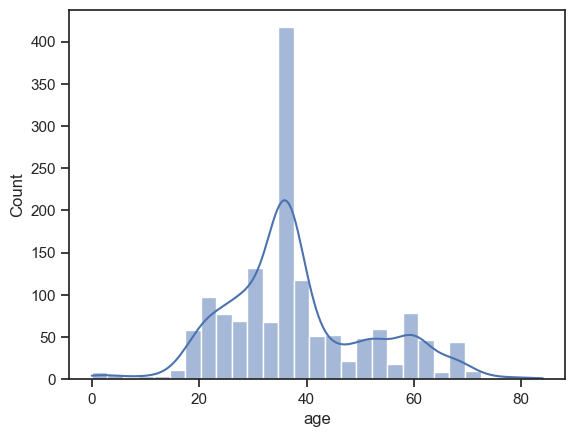

In [57]:
sns.histplot(cleaned_df3.age,kde=True)

### Bivariate Analysis

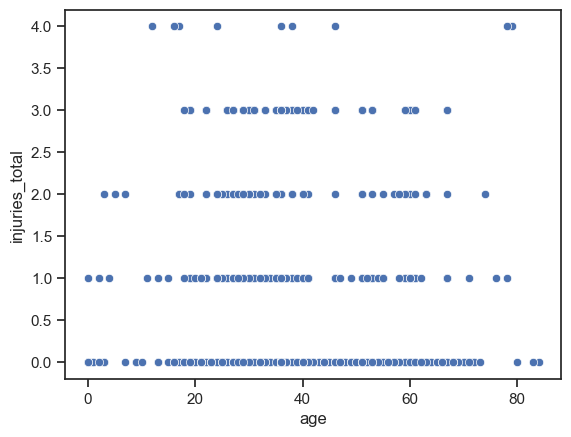

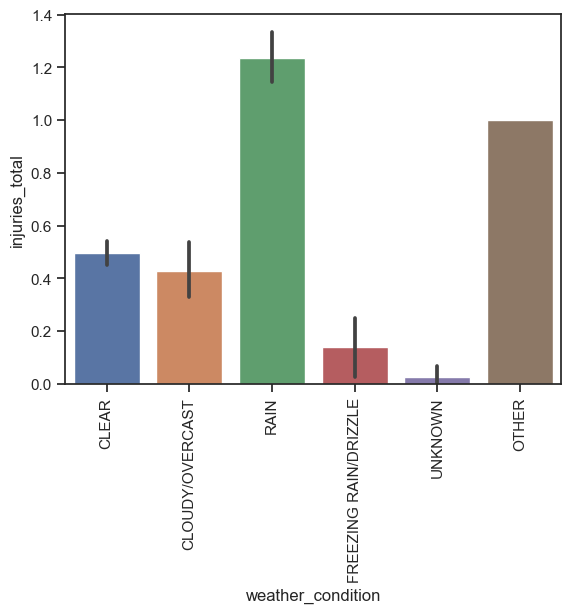

In [58]:
# Create a scatter plot of age vs. injuries_total
sns.scatterplot(x='age', y='injuries_total', data=cleaned_df3)
plt.show()
# Create a bar plot of weather_condition vs. injuries_total
sns.barplot(x='weather_condition', y='injuries_total', data=cleaned_df3) 
plt.xticks(rotation=90)
plt.show()

### Multivariate Analysis

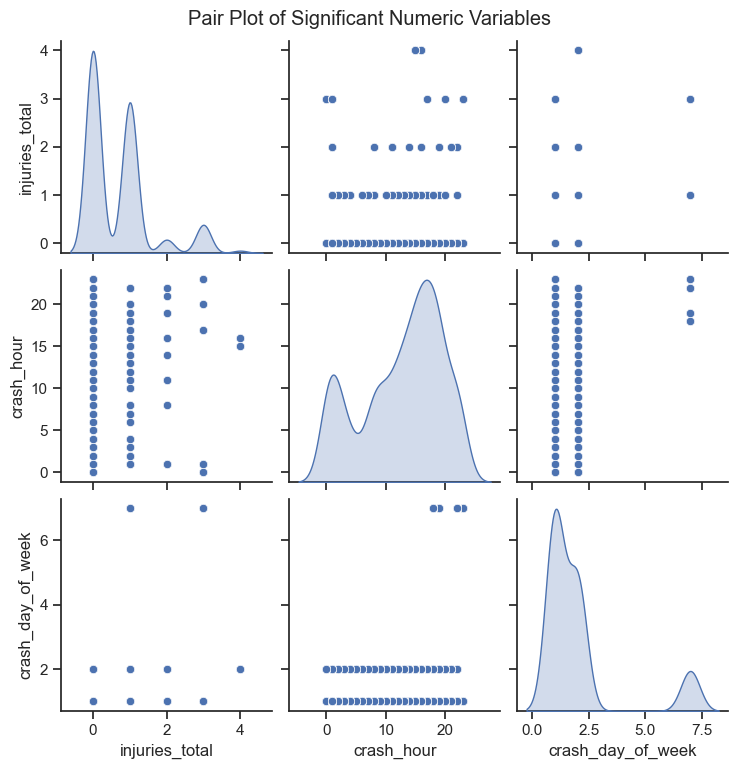

In [59]:
# List of numeric columns for multivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(cleaned_df3[significant_numeric_columns], diag_kind='kde')
pair_plot.fig.suptitle("Pair Plot of Significant Numeric Variables", y=1.02)

plt.show()

# 7. Modeling

### Model 1


#### Research Question:
What are the significant factors influencing the severity of traffic crashes, and can they be used to predict the severity level (e.g., minor, moderate, severe)?

In [60]:
# Selecting a subset of columns for the model
selected_columns = [
    'posted_speed_limit', 'weather_condition', 'roadway_surface_cond', 
    'crash_hour', 'crash_day_of_week', 'unit_type', 'vehicle_type', 
    'state', 'age', 'safety_equipment', 'airbag_deployed', 'injury_classification'
]

# Create a new DataFrame with selected columns
w_df = cleaned_df3[selected_columns].copy()



Features and Target Definition: Here We Separate features (X) and the target (y) from the DataFrame

In [61]:
# Define features (X) and target (y)
X = w_df.drop(columns=['injury_classification'])
y = w_df['injury_classification']



Train-Test Split: We split the data into training and testing sets using a 75-25 split ratio.

In [62]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Preprocessing: Now we Define preprocessing steps for numerical and categorical columns using StandardScaler and OneHotEncoder.

In [63]:
# Define preprocessing steps for numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



Pipeline Creation:We then Create a pipeline that combines preprocessing and the RandomForestClassifier model.

In [64]:
# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])



Model Fitting: We put the pipeline to the training data.

In [65]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['posted_speed_limit', 'crash_hour', 'crash_day_of_week', 'age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['weather_condition', 'roadway_surface_cond', 'unit_type',
       'vehicle_type', 'state', 'safety_equipment', 'airbag_deployed'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

Prediction and Evaluation: We Predict outcomes on the test set and evaluates the model's performance using confusion matrix and classification report.

In [66]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

In [67]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 24   0   0   0]
 [  1 219   2   0]
 [  0  17  90   2]
 [  0   5  11   9]]

Classification Report:
                           precision    recall  f1-score   support

   INCAPACITATING INJURY       0.96      1.00      0.98        24
 NO INDICATION OF INJURY       0.91      0.99      0.95       222
NONINCAPACITATING INJURY       0.87      0.83      0.85       109
   REPORTED, NOT EVIDENT       0.82      0.36      0.50        25

                accuracy                           0.90       380
               macro avg       0.89      0.79      0.82       380
            weighted avg       0.90      0.90      0.89       380



The model achieved an accuracy of approximately 90%. The classification report provides a detailed breakdown of performance for each class, including precision, recall , and F1-score . The weighted average F1-score gives an overall measure of the model's performance across all classes.

Overall, the model appears to perform well, particularly in identifying "INCAPACITATING INJURY" cases. However, it shows lower recall for the "REPORTED, NOT EVIDENT" class, indicating potential room for improvement in identifying such cases. 

### Model2

### Model3

Research Question: How do different road surface conditions (e.g., wet, dry) and defects (e.g., potholes) influence the likelihood and severity of crashes, and can we recommend road improvements based on this analysis?

In [68]:
selected_columns = ['roadway_surface_cond', 'road_defect','injuries_total']
rd_df = cleaned_df3[selected_columns].copy() 
rd_df.head()

,roadway_surface_cond,road_defect,injuries_total
0,DRY,NO DEFECTS,1
1,DRY,NO DEFECTS,1
2,DRY,NO DEFECTS,1
3,DRY,NO DEFECTS,1
4,DRY,NO DEFECTS,1


Using one hot-encoding to perform processing  

In [69]:
# Preprocessing: Convert categorical variables into numerical using one-hot encoding
data_encoded = pd.get_dummies(rd_df, columns=['roadway_surface_cond', 'road_defect'])

We Separate features (X) and the target (y) from the DataFrame


In [70]:
# Split data into features (X) and target (y)
X = data_encoded.drop('injuries_total', axis=1)
y = data_encoded['injuries_total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using a standard scaler to standerdize 

In [71]:
# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Intiatializing and fiting the KNN model 

In [72]:


# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5164473684210527


The model achived an accuracy of about 51% which is slightly above average  

### Model4

Effectiveness of Safety Equipment:

Research Question: What is the impact of safety equipment usage (e.g., seatbelts, airbags) on the occurrence and outcomes of crashes, and can we quantify their effectiveness in reducing injuries?

In [73]:
selected_columns = ['safety_equipment','airbag_deployed','injury_classification','injuries_total']
new_df = cleaned_df3[selected_columns].copy() 
new_df.head()

,safety_equipment,airbag_deployed,injury_classification,injuries_total
0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,1
1,NONE PRESENT,missing,NONINCAPACITATING INJURY,1
2,NONE PRESENT,missing,NONINCAPACITATING INJURY,1
3,HELMET NOT USED,missing,NO INDICATION OF INJURY,1
4,missing,missing,NONINCAPACITATING INJURY,1


In [74]:
safety_equipment_map = {'USAGE UNKNOWN':'USAGE UNKNOWN','SAFETY BELT USED':'SAFETY BELT USED','NONE PRESENT':'NONE PRESENT','HELMET NOT USED':'HELMET NOT USED','missing':'USAGE UNKNOWN',
                        'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'UNKNOWN/OTHER','CHILD RESTRAINT - FORWARD FACING': 'CHILD RESTRAINT','SAFETY BELT NOT USED': 'SAFETY BELT NOT USED','CHILD RESTRAINT - REAR FACING': 'CHILD RESTRAINT','DOT COMPLIANT MOTORCYCLE HELMET': 'UNKNOWN/OTHER','CHILD RESTRAINT - TYPE UNKNOWN': 'CHILD RESTRAINT',                       
                        }
new_df.safety_equipment = new_df.safety_equipment.map(safety_equipment_map)

airbag_deployed_map = {'missing':'DEPLOYMENT UNKNOWN','DID NOT DEPLOY':'DID NOT DEPLOY','NOT APPLICABLE':'NOT APPLICABLE','DEPLOYMENT UNKNOWN':'DEPLOYMENT UNKNOWN',
                        'DEPLOYED, COMBINATION':'DEPLOYED','DEPLOYED, FRONT': 'DEPLOYED','DEPLOYED, SIDE': 'DEPLOYED'                      
                        }
new_df.airbag_deployed = new_df.airbag_deployed.map(airbag_deployed_map)

In [75]:
# creating classes: 0 = not injured, 1 = injured
new_df['injuries_total'] = new_df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
new_df.rename(columns={'injuries_total': 'injuries_class'}, inplace=True)
new_df.head()

,safety_equipment,airbag_deployed,injury_classification,injuries_class
0,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,1
1,NONE PRESENT,DEPLOYMENT UNKNOWN,NONINCAPACITATING INJURY,1
2,NONE PRESENT,DEPLOYMENT UNKNOWN,NONINCAPACITATING INJURY,1
3,HELMET NOT USED,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,1
4,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONINCAPACITATING INJURY,1


In [76]:
# setting X, y for train-test-split
X = new_df.drop(columns= 'injuries_class')
y = new_df['injuries_class']

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [77]:
num_cols = new_df.drop(columns='injuries_class').select_dtypes('number').columns.tolist()
# creating a pipeline
# RobustScaler will use the median to scale
num_transform = Pipeline([('scale', RobustScaler())])

cat_cols = new_df.drop(columns='injuries_class').select_dtypes('object').columns.tolist()
# creating a pipeline
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [78]:
# combine both pipelines into one using columntransformer 
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [79]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names_out(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf.head()

,safety_equipment_CHILD RESTRAINT,safety_equipment_HELMET NOT USED,safety_equipment_NONE PRESENT,safety_equipment_SAFETY BELT NOT USED,safety_equipment_SAFETY BELT USED,safety_equipment_UNKNOWN/OTHER,safety_equipment_USAGE UNKNOWN,safety_equipment_nan,airbag_deployed_DEPLOYED,airbag_deployed_DEPLOYMENT UNKNOWN,airbag_deployed_DID NOT DEPLOY,airbag_deployed_NOT APPLICABLE,injury_classification_INCAPACITATING INJURY,injury_classification_NO INDICATION OF INJURY,injury_classification_NONINCAPACITATING INJURY,"injury_classification_REPORTED, NOT EVIDENT"
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [80]:
# observing y_train(classes) count 
y_train.value_counts(normalize=True)

0    0.510975
1    0.489025
Name: injuries_class, dtype: float64

In [81]:
# Using the SMOTE procedure to solve class imbalance problems
X_train_tf, y_train = SMOTE().fit_resample(X_train_tf, y_train)
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: injuries_class, dtype: float64

In [82]:
# Create and fit a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tf, y_train)

params_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

# create grid search 
grid = GridSearchCV(clf, params_grid, cv=3)

# fit x_train and y_train to grid 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

c:\Users\Rfwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


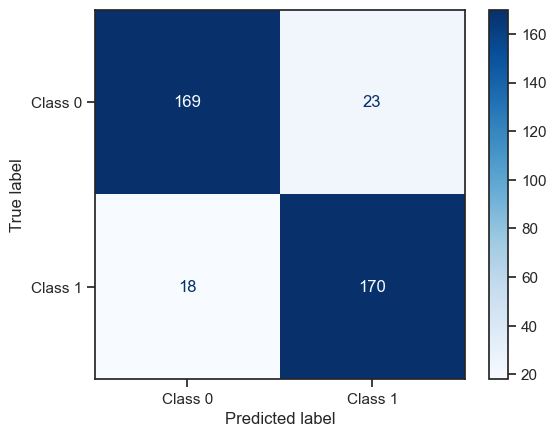

In [83]:
# Get predictions
y_pred = grid.best_estimator_.predict(X_test_tf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [84]:
# Calculate RMSE (Root Mean Squared Error) - applicable for regression tasks
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate recall, precision, accuracy, and F1-score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("RMSE:", round(rmse,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))
print("Accuracy:", round(accuracy,2))
print("F1-Score:", round(f1,2))

RMSE: 0.33
Recall: 0.9
Precision: 0.88
Accuracy: 0.89
F1-Score: 0.89


### Model5

Temporal and Environmental Patterns:

Research Question: Are there specific time periods (e.g., day vs. night, day of the week) or environmental conditions (e.g., weather, lighting) that are associated with higher crash rates, and can we identify potential risk factors during these periods?

In [85]:
# Select features and target variable
features = cleaned_df3[['crash_day_of_week', 'weather_condition', 'lighting_condition']]
target = cleaned_df3['injuries_fatal']  # Binary variable: 1 if crash occurred, 0 if not

# Preprocessing: Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['crash_day_of_week', 'weather_condition', 'lighting_condition'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a KNN classifier model
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#print accuracy and the confusion matrix
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:", conf_matrix)


Accuracy: 1.0
Confusion Matrix: [[304]]


In [86]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred)

#print the classification report
print("Classification Report:", class_report) 

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       304

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304



The classification report shows that the model is performing perfectly on the class 0  predictions(no fatal injuries), with all metrics being at their highest possible values. 

### Model6

6. Geographic Hotspots and Prevention Strategies:<br>
Research Question: Can we identify geographic hotspots with higher crash frequencies, and what targeted prevention strategies (e.g., improved signage, traffic control) can be recommended

In [87]:
# create a dataframe
loc_columns = ['location', 'longitude', 'latitude', 'traffic_control_device', 'injuries_total']
loc_df = df[loc_columns].copy()
print(loc_df.shape)
loc_df.head()

(1519, 5)


,location,longitude,latitude,traffic_control_device,injuries_total
0,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
1,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
2,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
3,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
4,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1


In [88]:
# listing the locations with the highest injury totals
loc_df.groupby(['location'])['injuries_total'].sum().sort_values(ascending=False).head(10)

location
POINT (-87.648659602931 41.918266954406)    216
POINT (-87.749419400442 41.881873993147)     72
POINT (-87.746642059758 41.968151986112)     54
POINT (-87.706710740738 41.895661728843)     26
POINT (-87.670066249482 41.989020193052)     26
POINT (-87.643254334859 41.930032879745)     25
POINT (-87.665717246618 41.83059130574)      25
POINT (-87.765254629117 41.887270170136)     25
POINT (-87.726617377571 41.91705557303)      25
POINT (-87.726554030886 41.906127875249)     25
Name: injuries_total, dtype: int64

Text(0.5, 1.0, 'Location distribution of injuries')

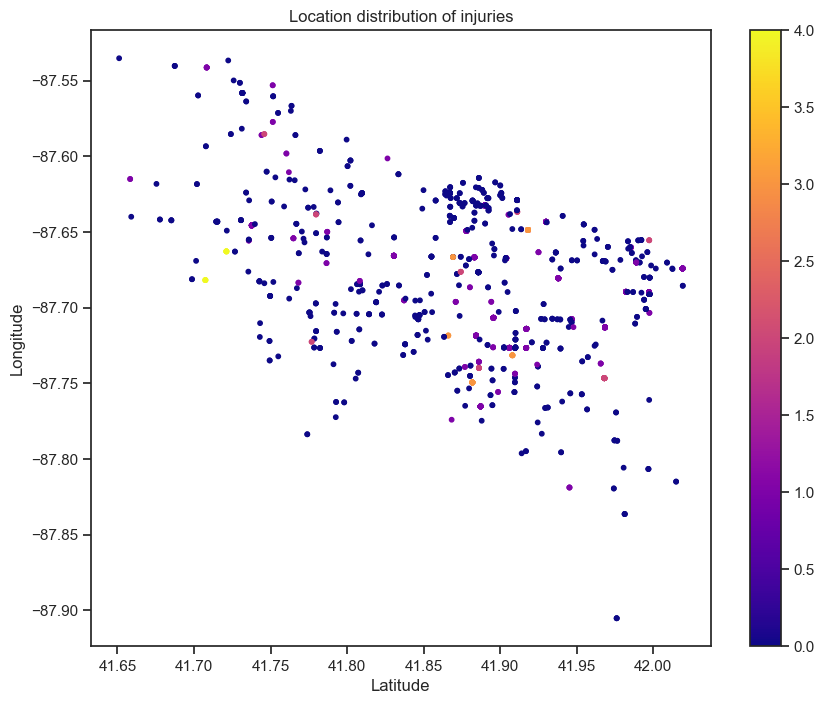

In [89]:
# scatterplot of accident location distribution
fig, ax = plt.subplots(figsize=[10,8])
plt.scatter(loc_df['latitude'], loc_df['longitude'], cmap='plasma', zorder=1000, s=10, c=loc_df['injuries_total'])
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location distribution of injuries')

In [90]:
# creating injury class: 0 = not injured, 1 = injured
loc_df['injuries_total'] = loc_df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
loc_df.rename(columns={'injuries_total': 'injury'}, inplace=True)
loc_df.head()

,location,longitude,latitude,traffic_control_device,injury
0,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
1,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
2,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
3,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1
4,POINT (-87.713051267198 41.968512941476),-87.713051,41.968513,TRAFFIC SIGNAL,1


In [91]:
# setting X, y for train-test-split
X_lr = loc_df.drop(columns= ['injury'])
y_lr = loc_df['injury']

# train-test-split, test_size = 25%, random_state = 42
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = .2, random_state=1)

In [92]:
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [93]:
# implementing pipeline using columntransformer 
col1 = ['traffic_control_device']
col2 = loc_df.drop(columns=['injury', 'traffic_control_device', 'location']).select_dtypes('object').columns.tolist()
preprocessing = ColumnTransformer([('cat', cat_transform, col1)])

# preprocessing X_train and X_test
X_train_pp = preprocessing.fit_transform(X_train_lr)
X_test_pp = preprocessing.transform(X_test_lr)

In [94]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_feat = slice_pipe.named_steps['encoder'].get_feature_names_out(col1)
X_train_pp = pd.DataFrame(X_train_pp,columns=[*col2, *cat_feat])
X_train_pp

,traffic_control_device_NO CONTROLS,traffic_control_device_OTHER,traffic_control_device_SCHOOL ZONE,traffic_control_device_STOP SIGN/FLASHER,traffic_control_device_TRAFFIC SIGNAL,traffic_control_device_UNKNOWN
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1210,0.0,0.0,0.0,0.0,1.0,0.0
1211,0.0,0.0,0.0,0.0,1.0,0.0
1212,1.0,0.0,0.0,0.0,0.0,0.0
1213,1.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# observing y_train(classes) count 
y_train_lr.value_counts(normalize=True)

0    0.519342
1    0.480658
Name: injury, dtype: float64

In [96]:
# instantiate and fit logisticregression
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train_pp, y_train_lr)

LogisticRegression()

c:\Users\Rfwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


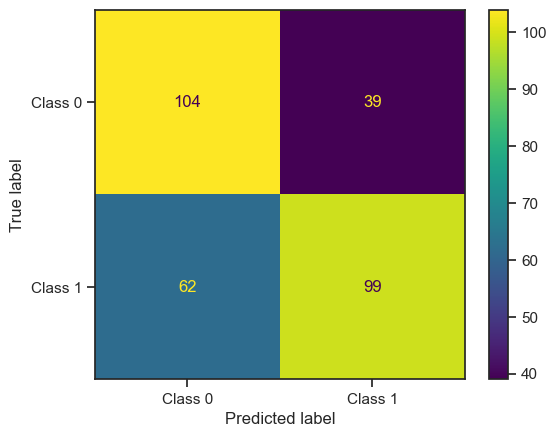

In [97]:
# Get predictions and plot confussion matrix
y_pred_lg = log_reg.predict(X_test_pp)

# Calculate the confusion matrix
con_mat = confusion_matrix(y_test_lr, y_pred_lg)

# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=['Class 0', 'Class 1'])
display.plot()

plt.show()

In [98]:
# Calculate RMSE (Root Mean Squared Error) - applicable for regression tasks
rmse_lr = mean_squared_error(y_test_lr, y_pred_lg, squared=False)

# Calculate recall, precision, accuracy, and F1-score
recall_lr = recall_score(y_test_lr, y_pred_lg)
precision_lr = precision_score(y_test_lr, y_pred_lg)
accuracy_lr = accuracy_score(y_test_lr, y_pred_lg)
f1_lr = f1_score(y_test_lr, y_pred_lg)

print("RMSE:", round(rmse_lr,2))
print("Recall:", round(recall_lr,2))
print("Precision:", round(precision_lr,2))
print("Accuracy:", round(accuracy_lr,2))
print("F1-Score:", round(f1_lr,2))

RMSE: 0.58
Recall: 0.61
Precision: 0.72
Accuracy: 0.67
F1-Score: 0.66


# 8. Conclusions

# 9.Recommendations